# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe


# Problems in Chapter 5

## Problem 1

The flipping condition is fulfilled when both of the following equations are zero:

$$
{dE \over {d\theta}} = 2 K_u \sin \theta \cos \theta - M_s B \sin (\phi - \theta),
$$

and again

$$
{d^2 E \over {d\theta^2}} = 2 K_u \cos (2\theta) + M_s B \cos (\phi - \theta ).
$$

For $\phi = 180, \theta = 0$ (originally antiparallel), we have:

$${d^2 E \over {d\theta^2}} = 2 K_u[1] + M_s B[-1] = 0$$
so, solving for $B$ and setting equal to $B_c$ by definition:
$$
B_c = { {2K_u}\over{M_s} }
$$

Because $B_c=\mu_o H_c, H_c = B_c/\mu_o$.  

## Problem 2a

For this problem, we read in some hysteresis data into a Pandas dataframe and work on it with the **Numpy** function **np.polyfit()**.  

In [4]:
import pandas as pd
import numpy as np
hyst=pd.read_csv('Chapter_5/hysteresis.txt',sep='\t')    # read in the data
hyst.head()

,H (Oe),M (emu)
0,5001.0,0.000748
1,4964.4,0.000745
2,4915.1,0.000740
3,4864.9,0.000736
4,4814.8,0.000731


Now we need to take the high field data (> 4000 Oe) and calculate a best fit line (actually two - one for the positive $H$ values and one for the negative, then average the two).  This is the high field susceptibility. 

In [5]:
H=hyst['H (Oe)']
mag=hyst['M (emu)']

hi=hyst[hyst['H (Oe)']>4000]                         # separate high field data
low=hyst[hyst['H (Oe)']<-4000]                       # separate low field data

slope1=np.polyfit(hi['H (Oe)'],hi['M (emu)'],deg=1)       # calculate slope at + end
slope2=np.polyfit(low['H (Oe)'],low['M (emu)'],deg=1)     # calculate slope at - end

slope=(slope1[0]+slope2[0])/2                         # return has [slope,intercept]
print(slope)


9.24807367593e-08


## Problem 2b

Now we subtract this paramagnetic slope for all H and plot both the corrected and uncorrected data.  

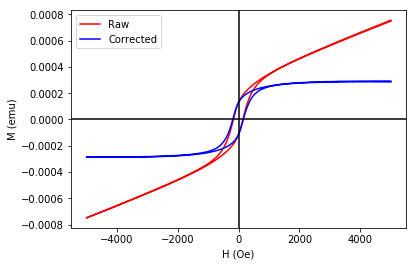

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
hyst['Mcorr']=hyst['M (emu)']-slope*hyst['H (Oe)']     # slope corrected values of mag

plt.plot(hyst['H (Oe)'],hyst['M (emu)'],'r-',label='Raw')
plt.plot(hyst['H (Oe)'],hyst['Mcorr'],'b-',label='Corrected')
plt.xlabel('H (Oe)')
plt.ylabel('M (emu)')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend();

The red loop shows the hysteresis behavior as measured.  The quasi-linear portion at high fields is the "high field slope" $\chi_{hf}$ which is the paramagnetic slope.  All the ferromagnetic contributions are at saturation (the loop is closed and reversible).  Subtracting off this high field slope gives the blue line, which allows calculation of the saturation magnetization ($M_s$), which is the intercept of the zero slope line at high fields with the $y$ axis.  The intercept of the blue line gives the magnetization remaining at zero field after exposure to a high saturating field, or the saturation remanence ($M_r$).  The intercept of the hysteresis loop with the $y$ axis is the coercive field $H_c$.  

## Problem 2c

Finding the $M_s$ values is pretty simple though it's good to take the average of the slope-corrected data at both +H and -H: $2.89 \times 10^{-4} + (-2.86 \times 10^{-4}) = 2.875 \times 10^{-4} emu$.

$M_r$ is a bit more tricky. One could fit a spline to the data and evaluate at H=0 but it's fine to just approximate this: $1.22 \times 10^{-4} emu$ so Mr/Ms = 0.425.   

H_c is also a bit asymmetric. On the descending branch I find -190 Oe and on the ascending branch I find +154 Oe so an average value of 172 Oe. With the H_{cr} estimate of 264 Oe, this yields a H_{cr}/H_c of 1.53.

So overall, this sample looks like it is more likely to contain single domain grains than multidomain ones.

### Problem 2c

Given our values for Ms and mass $(.0106 g)$ this yields 0.027 emu/g which represents a fraction of 0.00029. 
